## <span style="color:#0B3B2E;float:right;font-family:Calibri">Jordan Graesser</span>

# MpGlue
### Handling image files with MpGlue
---

## Opening images
#### Everything begins with the `ropen` function.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import skimage
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10, 10)

In [1]:
import mpglue as gl

# Setup the name of the image you want to open.
image2open = '../testing/data/225r85_etm_2000_0424.tif'

# Load a pointer to an image and give it a variable name.
with gl.ropen(image2open) as i_info:
    print(dir(i_info))

['__class__', '__del__', '__delattr__', '__dict__', '__doc__', '__enter__', '__exit__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_band_list', '_cleanup', '_get_driver_name', '_get_file_format', '_get_hdr_info', '_open_array', '_open_dataset', '_reshape', '_reshape2predictions', 'bands', 'block_x', 'block_y', 'bottom', 'build_overviews', 'calculate_stats', 'cellX', 'cellY', 'check_clouds', 'check_corrupted', 'check_corrupted_bands', 'close', 'close_all', 'close_band', 'close_file', 'color_interpretation', 'cols', 'contains', 'contains_value', 'copy', 'datasource', 'datasource_info', 'directory', 'epsg', 'extent', 'file_format', 'file_name', 'file_open', 'filename', 'fill', 'geo_transform', 'get_band', 'get_chunk_size', 'get_image_info', 'get_metadata', 'get_stats', 'hdf_file', 'hdr_file', 'hist', 'image_mode', 'intersects'

* We haven't actually loaded any image data.
* The variable, `i_info`, acts as a pointer to the GeoTiff. 
* In Python terms, it is a **class instance**. The only way you can know this is by checking the documentation of `ropen` and knowing that it creates a class object, or by checking the variable's type with the built-in **type** function.

In [2]:
# Check the variable type
print(type(i_info))

<class 'mpglue.raster_tools.ropen'>


* A class instance of `mpglue.raster_tools`.

## Getting image information
* Now, back to `i_info`. A class instance can contain various methods, the pinnacle of object orientated programming. 
* Check the instance methods with **dir**.
* Now we know what type of information we can get without opening the entire image.
* Class instance methods are called as objects of the instance, which in Python is by **instance._method_**.

In [4]:
# Get the name of the directory and file.
with gl.ropen(image2open) as i_info:
    
    print i_info.file_name
    print i_info.filename
    print i_info.rows, i_info.cols
    print i_info.shape
    print i_info.name
    print i_info.left, i_info.right

## Getting image data
* Not all methods of `ropen` are information. Others are class functions.
* For example, we can open the image as a n-dimensional array by calling `read` from the class instance itself.

In [5]:
# Load the image as an n-dimensional array (NumPy array).
with gl.ropen(image2open) as i_info:
    image_array = i_info.read()

In [6]:
# Now check the type of the variable, `image_array`.
print type(image_array)

<type 'numpy.ndarray'>


* The variable `image_array` is a **NumPy** object. 

In [7]:
# Check the shape of the image_array. *It should be the same size as the loaded image, except only one band.
print image_array.shape

(224, 235)


### What happened to the other 5 bands?
* We need to check the documentation of `read`.

In [8]:
print help(i_info.read)

Help on method read in module mpglue.raster_tools:

read(self, bands2open=1, i=0, j=0, rows=-1, cols=-1, d_type=None, compute_index='none', sensor='Landsat', sort_bands2open=True, predictions=False, y=0.0, x=0.0, check_x=None, check_y=None) method of mpglue.raster_tools.ropen instance
    Reads a raster as an array
    
    Args:
        bands2open (Optional[int or int list or dict]: Band position to open, list of bands to open, or a
            dictionary of name-band pairs. Default is 1.
    
            Examples:
                bands2open = 1        (open band 1)
                bands2open = [1,2,3]  (open first three bands)
                bands2open = [4,3,2]  (open bands in a specific order)
                    *When opening bands in a specific order, be sure to set ``sort_bands2open`` as ``False``.
                bands2open = -1       (open all bands)
                bands2open = {'blue': 1, 'green': 2, 'nir': 4}  (open bands 1, 2, and 4)
    
        i (Optional[int]): Starti

### Now we see that the default is to only open 1 band (the first band of the image).
* If we want to open all of the bands then we have to specify this information in the `bands2open` parameter.

In [9]:
# We can load the new image into the same variable and it will be overwritten.
# Rather than open all 6 bands, we can start by loading two bands, the red and NIR.
with gl.ropen(image2open) as i_info:
    image_array = i_info.read(bands2open=[3, 4])

In [10]:
# Check the array shape again.
print image_array.shape

(2, 224, 235)


### What if we only want a portion of an image?
* First, go back to the help documentation. 
* The parameters, `i` and `j` are the starting row and column positions, respectively.
* The parameters, `rows` and `cols` are the number of samples to load.

In [11]:
# Open a 500 x 500 pixel array
with gl.ropen(image2open) as i_info:
    image_array = i_info.read(bands2open=[3, 4], i=20, j=30, rows=50, cols=50)

In [12]:
print image_array.shape

(2, 50, 50)


## Vegetation indexes
* MpGlue's `read` class has built-in vegetation indices.

### We see that NDVI is one option.
* By default, `compute_index` is set to 'none'.
* Use the `compute_index` option to return NDVI instead of the spectral bands.

In [2]:
with gl.ropen(image2open) as i_info:
    image_array = i_info.read(compute_index='ndvi')

### Viewing images
* For quick visualization, you can use built-it methods.

In [6]:
# Let's view the NDVI array
with gl.ropen(image2open) as i_info:
    i_info.read(compute_index='ndvi')
    i_info.show(show_which='ndvi')

In [7]:
# We can also view a band in greyscale, but note that
# the array will be set as the red and NIR bands if
# an index was computed. Here, we are viewing band 1, 
# which is the red band (1 of 2 bands in the array).
i_info.show(color_map='Greys', band=1)

In [83]:
# In order to view any of the image's original bands,
# reload the array. Here, we load the entire image.
image_array = i_info.read(bands2open=-1, i=2000, j=2000, rows=500, cols=500)

In [11]:
print i_info.array_shape

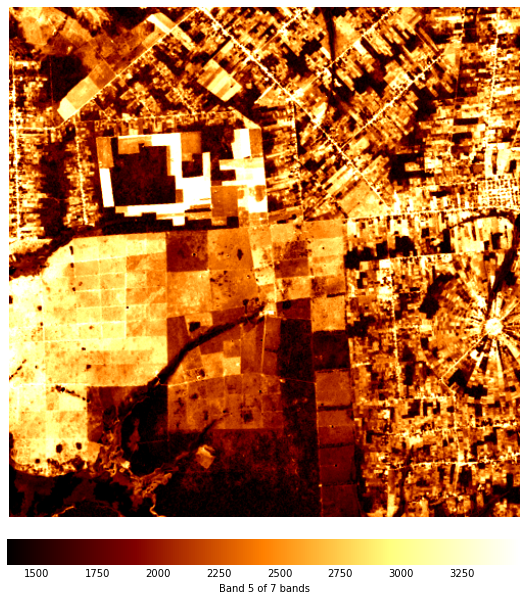

In [84]:
# Now view the MidIR band.
i_info.show(band=5, color_map='afmhot')

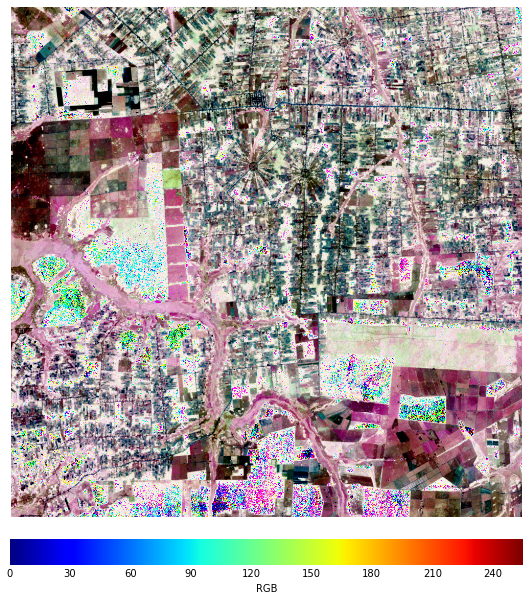

In [87]:
# Load the three visible bands and
#   view the true color plot.
# !Warning! 16-bit arrays are scaled to byte
#   when displaying RGB images.
image_array = i_info.read(bands2open=[3, 2, 1], i=2000, j=2000, \
                             rows=1000, cols=1000, sort_bands2open=False)

i_info.show(band='rgb', clip_percentiles=(2, 98))

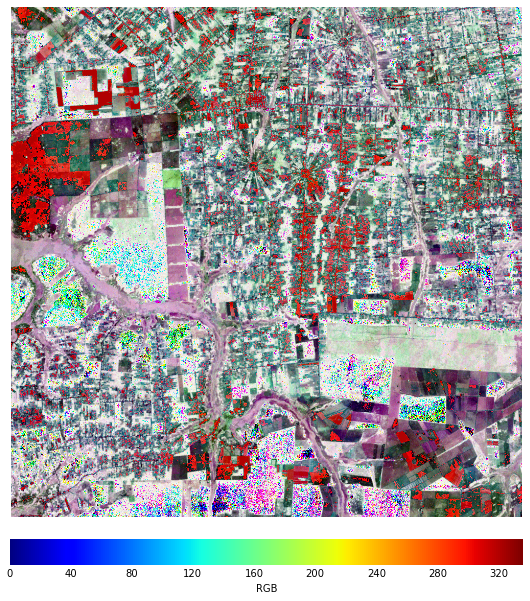

In [88]:
# Gamma correction
# 1 is baseline
# <1 will increase brightness
# >1 will decrease brightness
image_array = i_info.read(bands2open=[3, 2, 1], i=2000, j=2000, \
                             rows=1000, cols=1000, sort_bands2open=False)

i_info.show(band='rgb', clip_percentiles=(2, 98), gammas=[.95, 1., 1.])